# Projeto Final - MLOps - Dataset do Censo

## Grupo:
- Lucas Natan Correia Couri - lncc2@cin.ufpe.br
- Mariama Celi Serafim de Oliveira - mcso@cin.ufpe.br
- Laianna Lana Virginio da Silva - llvs2@cin.ufpe.br
- Priscilla Amarante de Lima - pal4@cin.ufpe.br
- Liviany Reis Rodrigues - lrr@cin.ufpe.br

## Link do Git:
- https://github.com/mariamaOlive/residencia-mlops

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt

In [2]:
#Valor da SEED utilizada no projeto
SEED = 42

# 1. Entendimento do Negócio

O objetivo do problema é determinar se uma pessoa ganha mais ou menos de 50 mil dólares. Serão utilizadas as informações do censo americano (14 features) a fim de gerar os modelos.

# 2. Compreensão dos Dados

*   Descrição da base: https://archive.ics.uci.edu/ml/datasets/census+income

Número de Instâncias:
* Dados de Treino: 32561
* Dados de Teste: 16281

Valores Ausentes:
* Foram substituídos por " ?"

Número de Atributos: 14
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Distribuição da Classe:
* '>50K' , '<=50K'.
    *   '<=50K' : 76.07% / 75.22% (sem as linhas ' ?')
    *   '>50K'  : 23.93% / 24.78% (sem as linhas ' ?')

# 3. Preparação dos Dados

## Carregando a Base de Dados

In [3]:
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("Dados/adult.data", names = columns_name, index_col = False)
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


## Análise Exploratória de Dados

Nesta seção, serão analisados a distribuição e característica dos atributos, valores faltantes, possíveis outliers e nível de separatibilidade. 

### Tipos dos dados

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Mudando os atributos para seus tipos corretos.

In [5]:
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['class'] = df['class'].astype('category')
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

### Descrição dos dados

Sumário dos dados contínuos.

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Dados Duplicados

Checando dados duplicados. Ao final, verificamos que não há linhas duplicadas.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


### Preenchendo Dados Faltantes

In [9]:
def tratamento_faltantes(df, columns_name):
    ## Printa os atributos com dados faltantes (" ?")
    for coluna in columns_name:
        if len(df[df[coluna] == " ?"]) > 0:
            print(coluna)
            print(len(df[df[coluna] == " ?"]))
    
    ## Tratamento dos dados faltantes:
    atr_faltantes = ["workclass", "occupation", "native-country"]
    for atr in atr_faltantes:
        categorias_atr = df.groupby(atr).sum().index.tolist()
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(categorias_atr)
        df[atr] = df[atr].replace(" ?", np.nan)
        df[atr] = df[atr].interpolate(method = 'pad')

Tratamento dos dados faltantes: 
1. Transforma para numérico (LabelEnconder) 
2. Substitui " ?" por NaN (replace)
3. Utiliza a frequência dos vizinhos mais próximos para estimar um valor para NaN (interpolate)

In [10]:
tratamento_faltantes(df, columns_name)

workclass
1836
occupation
1843
native-country
582


### Checando Outliers

<AxesSubplot:>

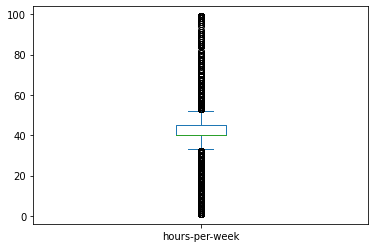

In [11]:
df['hours-per-week'].plot.box()

<AxesSubplot:>

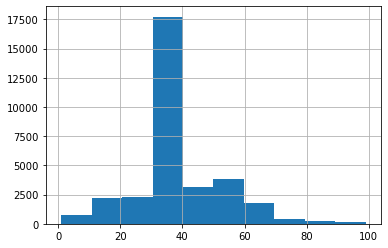

In [12]:
df['hours-per-week'].hist()

<AxesSubplot:>

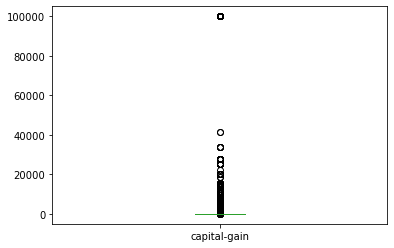

In [13]:
df['capital-gain'].plot.box()

<AxesSubplot:>

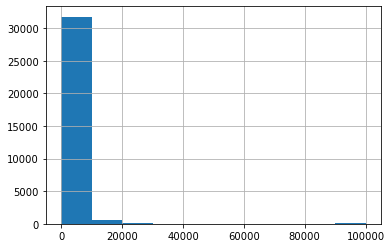

In [14]:
df['capital-gain'].hist()

<AxesSubplot:>

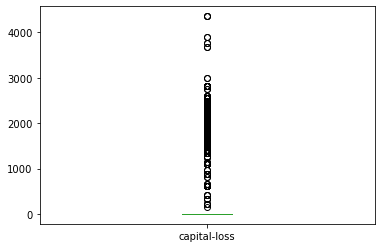

In [15]:
df['capital-loss'].plot.box()

<AxesSubplot:>

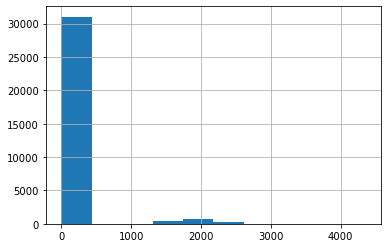

In [16]:
df['capital-loss'].hist()

### Colunas Redundantes

In [17]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


"education" e "education-num" significam a mesma coisa. Vamos utilizar "education-num" e dropar "education", já que "education-num" é a codificação ordinal de "education"

In [18]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [19]:
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

### Frequência das Variáveis Categóricas (Value_Counts)

In [20]:
df['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

In [21]:
df['workclass'].value_counts()

 Private             24072
 Self-emp-not-inc     2686
 Local-gov            2204
 State-gov            1374
 Self-emp-inc         1177
 Federal-gov          1002
 Without-pay            15
 Never-worked            7
Name: workclass, dtype: int64

In [22]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [23]:
df['marital-status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [24]:
df['occupation'].value_counts()

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3980
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: occupation, dtype: int64

In [25]:
df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [26]:
df['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [27]:
df['native-country'].value_counts()

 United-States                 29676
 Mexico                          653
 Philippines                     200
 Germany                         141
 Canada                          124
 Puerto-Rico                     118
 El-Salvador                     109
 India                           101
 Cuba                             97
 England                          93
 Jamaica                          83
 South                            80
 China                            77
 Dominican-Republic               74
 Italy                            73
 Vietnam                          72
 Guatemala                        64
 Japan                            63
 Columbia                         61
 Poland                           60
 Taiwan                           51
 Haiti                            45
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           30
 

In [28]:
df['class'].value_counts()

 <=50K    24698
 >50K      7839
Name: class, dtype: int64

### Visualização Idade e Renda

In [29]:
total_menos_50 = df[df['class'] == " <=50K"]
total_mais_50 = df[df['class'] == " >50K"]

homem_menos_50 = df[(df['class'] == " <=50K") & (df['sex'] == " Male")]
mulher_menos_50 = df[(df['class'] == " <=50K") & (df['sex'] == " Female")]

homem_mais_50 = df[(df['class'] == " >50K") & (df['sex'] == " Male")]
mulher_mais_50 = df[(df['class'] == " >50K") & (df['sex'] == " Female")]

c:\Users\llvs2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


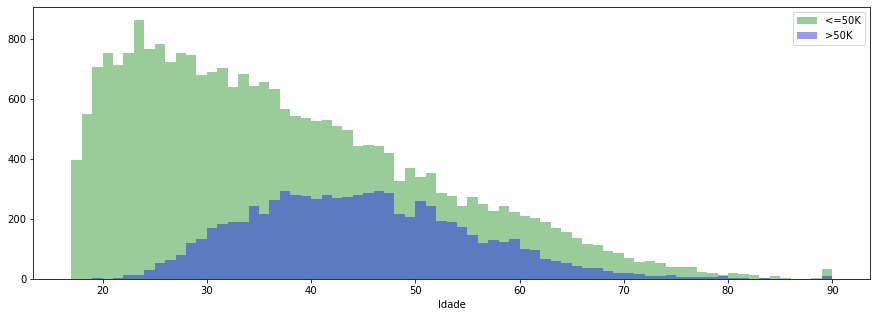

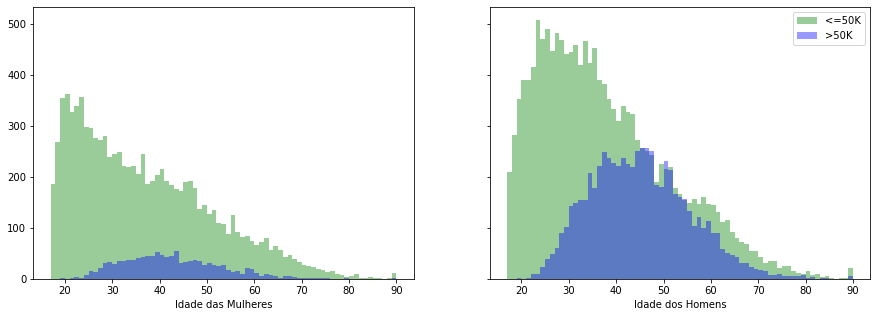

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.distplot(total_menos_50['age'], bins = range(17, 91, 1), \
             kde = False, color = 'green', label = '<=50K')
sns.distplot(total_mais_50['age'], bins = range(17, 91, 1), \
             kde = False, color = 'blue', axlabel = 'Idade', label = '>50K')
plt.legend()


fig, axes = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(15, 5)

sns.distplot(mulher_menos_50['age'], ax = axes[0], bins = range(17, 91, 1), \
             kde = False, color = 'green', label = '<=50K')
sns.distplot(mulher_mais_50['age'], ax = axes[0], bins = range(17, 91, 1), \
             kde = False, color = 'blue', axlabel = 'Idade das Mulheres', label = '>50K')
plt.legend()


sns.distplot(homem_menos_50['age'], ax = axes[1], bins = range(17, 91, 1), \
             kde = False, color = 'green', label = '<=50K')
sns.distplot(homem_mais_50['age'], ax = axes[1], bins = range(17, 91, 1), \
             kde = False, color = 'blue', axlabel = 'Idade dos Homens', label = '>50K')
plt.legend()

Conclusões:

- A porcentagem de mulheres que ganham >50K é menor que a de homens;
- Pessoas com média de idade de 40 anos tendem a ganhar >50K;
- A grande maioria das pessoas jovens ganham <=50K.
    

### Visualização Educação e Renda

No handles with labels found to put in legend.


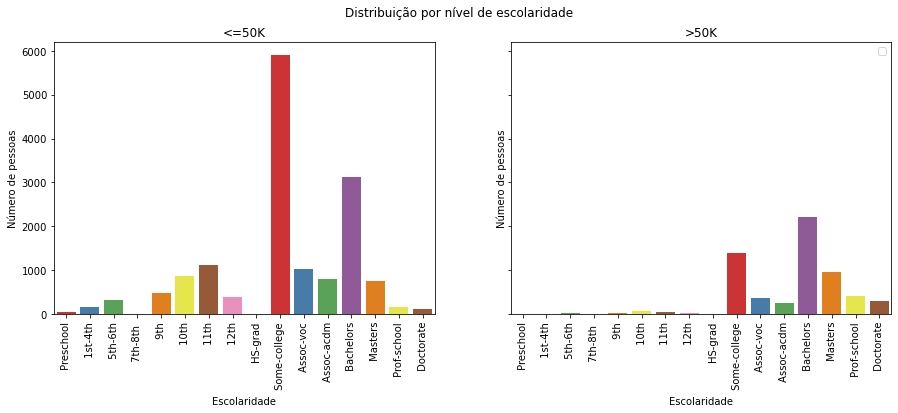

In [31]:
ordem = [" Preschool", " 1st-4th", " 5th-6th", " 7th-8th ", " 9th", " 10th", " 11th", " 12th", "HS-grad", " Some-college", " Assoc-voc", " Assoc-acdm"," Bachelors", " Masters", " Prof-school"," Doctorate"]
 
fig, axes = plt.subplots(1, 2, sharey = True)
fig.suptitle('Distribuição por nível de escolaridade')

fig.set_size_inches(15, 5)
vis_esc_1 = sns.countplot(x = "education", ax = axes[0], order = ordem, palette = "Set1", data = total_menos_50)
vis_esc_1.set(xlabel = 'Escolaridade', ylabel = 'Número de pessoas', title = '<=50K')
axes[0].tick_params(axis = 'x', rotation = 90)

vis_esc_2 = sns.countplot(x = "education", ax = axes[1], order = ordem, palette = "Set1", data = total_mais_50)
vis_esc_2.set(xlabel = 'Escolaridade', ylabel = 'Número de pessoas', title = '>50K')
axes[1].tick_params(axis = 'x', rotation = 90)
plt.legend()
 

Conclusão geral: pessoas com maior nível de escolaridade em sua maioria ganham mais de 50K.

# 4. Pré-processamento de Features

## Codificação das Variáveis Categóricas

Realizaremos a codificação One Hot Encoding, dado que os modelos a serem utilizados necessitam de entradas numérica. Esse tipo de codifição é indicado para variáveis categóricas nominais, pois atribui distâncias uniformes às categorias.

In [32]:
def onehot_encoder(df):

    colunas_cat = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
    
    for coluna in colunas_cat:

        #print(coluna)
        df_coluna = pd.get_dummies(df[coluna], prefix=coluna)
        df = df.join(df_coluna)
    
    return df

In [33]:
df = onehot_encoder(df)
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0


## Normalizando Variáveis Contínuas

Indica-se normalização uma vez que alguns modelos que serão utilizados são baseados em distância. Caso haja escala de distância muito distinta, pode ocorrer enviesamento em algumas features e consequentemente comprometimento na performance do classificador.

In [34]:
normalize = MinMaxScaler()

In [35]:
colunas = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week", "education-num"]

df[colunas] = normalize.fit_transform(df[colunas])

In [36]:
df[colunas].describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education-num
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.295692,0.120547,0.010785,0.020057,0.402452,0.605454
std,0.186822,0.071689,0.073880,0.092539,0.125989,0.171442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.000000,0.000000,0.397959,0.533333
50%,0.273973,0.112788,0.000000,0.000000,0.397959,0.600000
75%,0.424658,0.152611,0.000000,0.000000,0.448980,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Separando Features e Labels

In [37]:
colunas_drop = ["class", "education", "workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

#Dropando colunas nao mais utilizadas
df_X_train = df.drop(colunas_drop, axis = 1)
features_name = df_X_train.columns

#Convertendo para numpy
X_train = df_X_train.to_numpy()
y_train = df["class"].values

Codificando as classes para valores numéricos:
- '<=50K' :  0
- '>50K'  : 1 

In [38]:
label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

## Plot do conjunto de Treino (PCA)

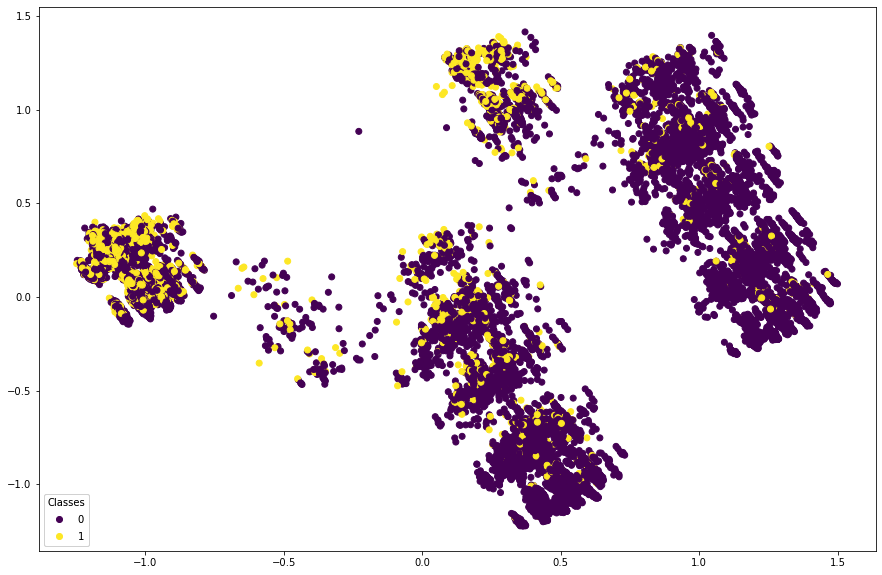

In [39]:
pca = PCA(2)
X_pca = pca.fit_transform(preprocessing.minmax_scale(X_train))

fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

# Importância das Features

In [40]:
rf = RandomForestClassifier(random_state = SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Text(0.5, 0, 'Feature Importance')

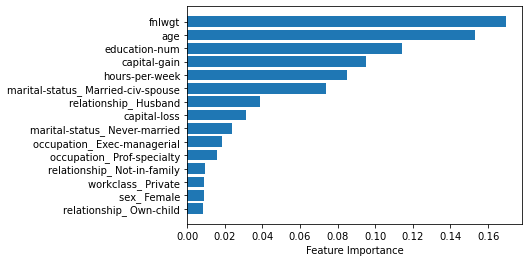

In [41]:
sort = rf.feature_importances_.argsort()

qtd = len(sort) - 15

plt.barh(features_name[sort][qtd:], rf.feature_importances_[sort][qtd:])
plt.xlabel("Feature Importance")